# Data Preprocessing

## Import Libraries

In [1]:
import pandas as pd
import numpy as np
import missingno as msno
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats 


Bad key "text.kerning_factor" on line 4 in
C:\Users\sumai\Anaconda3\lib\site-packages\matplotlib\mpl-data\stylelib\_classic_test_patch.mplstyle.
You probably need to get an updated matplotlibrc file from
https://github.com/matplotlib/matplotlib/blob/v3.1.3/matplotlibrc.template
or from the matplotlib source distribution


## Load Dataset
Please see the link to know more about the dataset: https://www.kaggle.com/jboysen/mri-and-alzheimers

In [2]:
df = pd.read_csv('oasis_cross-sectional.csv')
df.head()

,ID,M/F,Hand,Age,Educ,SES,MMSE,CDR,eTIV,nWBV,ASF,Delay
0,OAS1_0001_MR1,F,R,74,2.0,3.0,29.0,0.0,1344,0.743,1.306,NaN
1,OAS1_0002_MR1,F,R,55,4.0,1.0,29.0,0.0,1147,0.810,1.531,NaN
2,OAS1_0003_MR1,F,R,73,4.0,3.0,27.0,0.5,1454,0.708,1.207,NaN
3,OAS1_0004_MR1,M,R,28,NaN,NaN,NaN,NaN,1588,0.803,1.105,NaN
4,OAS1_0005_MR1,M,R,18,NaN,NaN,NaN,NaN,1737,0.848,1.010,NaN


## Data Preprocessing

#### Data Cleaning: Column Names

In [3]:
df.columns = ['ID', 'Gender', 'Hand', 'Age', 'Educ', 'SES', 'MMSE', 'CDR', 'eTIV', 'nWBV', 'ASF', 'Delay']
df.head()

,ID,Gender,Hand,Age,Educ,SES,MMSE,CDR,eTIV,nWBV,ASF,Delay
0,OAS1_0001_MR1,F,R,74,2.0,3.0,29.0,0.0,1344,0.743,1.306,NaN
1,OAS1_0002_MR1,F,R,55,4.0,1.0,29.0,0.0,1147,0.810,1.531,NaN
2,OAS1_0003_MR1,F,R,73,4.0,3.0,27.0,0.5,1454,0.708,1.207,NaN
3,OAS1_0004_MR1,M,R,28,NaN,NaN,NaN,NaN,1588,0.803,1.105,NaN
4,OAS1_0005_MR1,M,R,18,NaN,NaN,NaN,NaN,1737,0.848,1.010,NaN


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 436 entries, 0 to 435
Data columns (total 12 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   ID      436 non-null    object 
 1   Gender  436 non-null    object 
 2   Hand    436 non-null    object 
 3   Age     436 non-null    int64  
 4   Educ    235 non-null    float64
 5   SES     216 non-null    float64
 6   MMSE    235 non-null    float64
 7   CDR     235 non-null    float64
 8   eTIV    436 non-null    int64  
 9   nWBV    436 non-null    float64
 10  ASF     436 non-null    float64
 11  Delay   20 non-null     float64
dtypes: float64(7), int64(2), object(3)
memory usage: 41.0+ KB


#### What about Missing Values?

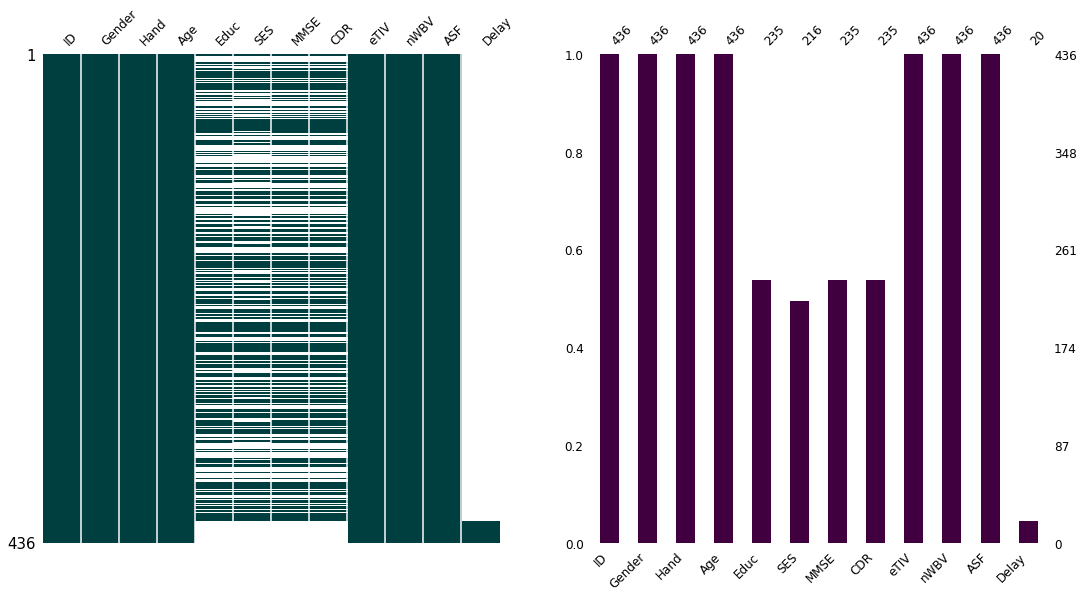

In [5]:
figure, (ax1, ax2) = plt.subplots(1, 2, figsize=(18,9))
msno.matrix(df, ax=ax1, sparkline=False, fontsize = 12, color=(0., 0.25, 0.25))
msno.bar(df, ax=ax2, fontsize = 12, color=(0.25, 0., 0.25))
plt.show()

In [6]:
def dfmiss (df):

    count = df.isnull().sum()

    df_miss = pd.DataFrame(index = df.columns, data =
                     {'data_type': df.dtypes,
                      'unique_values': df.nunique(),
                      'have_null?': df.isnull().any(),
                      'how many?' : count,
                      '%' : count/df.shape[0]*100 })
    return df_miss

dfmiss(df)

,data_type,unique_values,have_null?,how many?,%
ID,object,436,False,0,0.000000
Gender,object,2,False,0,0.000000
Hand,object,1,False,0,0.000000
Age,int64,73,False,0,0.000000
Educ,float64,5,True,201,46.100917
SES,float64,5,True,220,50.458716
MMSE,float64,17,True,201,46.100917
CDR,float64,4,True,201,46.100917
eTIV,int64,312,False,0,0.000000
nWBV,float64,182,False,0,0.000000


##### Our target variable is CDR and we don't want any missing data in that column. So, let's get rid of 'em.

In [7]:
df = df[df['CDR'].notnull()]

# Also let's remove the delay column as 95% of the data are missing
df = df[['ID', 'Gender', 'Hand', 'Age', 'Educ', 'SES', 'MMSE', 'CDR', 'eTIV', 'nWBV', 'ASF']]

##### Which columns contain missing values?

In [8]:
d = dfmiss(df)
missing_val_col = d[d['have_null?'] == True].index.to_list()
missing_val_col

['SES']

#### Handling Missing Values: Let's impute the SES Nan data as another label

In [9]:
df.SES = df.SES.replace(np.nan, 0.0)

ID        0
Gender    0
Hand      0
Age       0
Educ      0
SES       0
MMSE      0
CDR       0
eTIV      0
nWBV      0
ASF       0
dtype: int64

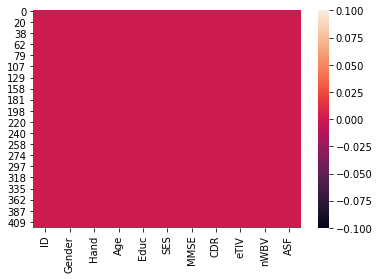

In [10]:
sns.heatmap(pd.isnull(df))
df.isnull().sum()

##### **Cool! We got rid of the missin values now!**

#### Encoding Categorical Features
##### Ordinal Encoding of df.Gender

In [11]:
df.Gender.unique()
dictionary = {'F': 1, 'M': 2}
df['Gender']= df['Gender'].map(dictionary)
df.head()

,ID,Gender,Hand,Age,Educ,SES,MMSE,CDR,eTIV,nWBV,ASF
0,OAS1_0001_MR1,1,R,74,2.0,3.0,29.0,0.0,1344,0.743,1.306
1,OAS1_0002_MR1,1,R,55,4.0,1.0,29.0,0.0,1147,0.810,1.531
2,OAS1_0003_MR1,1,R,73,4.0,3.0,27.0,0.5,1454,0.708,1.207
8,OAS1_0010_MR1,2,R,74,5.0,2.0,30.0,0.0,1636,0.689,1.073
9,OAS1_0011_MR1,1,R,52,3.0,2.0,30.0,0.0,1321,0.827,1.329


##### Ordinal Encoding of df.Hand

In [12]:
from sklearn.preprocessing import LabelEncoder
encoder_hand=LabelEncoder()
encoder_hand.fit(df.Hand.values)

encoder_hand.transform(df.Hand.values)
df[['Hand']]=encoder_hand.transform(df.Hand.values)
list(encoder_hand.classes_)

['R']

##### Ordinal Encoding of df.CDR, the Target

In [13]:
df.CDR.unique()
dictionary = {0.0: 0, 0.5:1, 1.0:1, 2.0:1}
df['CDR']= df['CDR'].map(dictionary)
df.head()

,ID,Gender,Hand,Age,Educ,SES,MMSE,CDR,eTIV,nWBV,ASF
0,OAS1_0001_MR1,1,0,74,2.0,3.0,29.0,0,1344,0.743,1.306
1,OAS1_0002_MR1,1,0,55,4.0,1.0,29.0,0,1147,0.810,1.531
2,OAS1_0003_MR1,1,0,73,4.0,3.0,27.0,1,1454,0.708,1.207
8,OAS1_0010_MR1,2,0,74,5.0,2.0,30.0,0,1636,0.689,1.073
9,OAS1_0011_MR1,1,0,52,3.0,2.0,30.0,0,1321,0.827,1.329


#### Removing Unimpactful Columns

In [14]:
df.drop('ID', axis=1, inplace = True)
df = df. drop('Hand', axis=1)

In [15]:
df.head()

,Gender,Age,Educ,SES,MMSE,CDR,eTIV,nWBV,ASF
0,1,74,2.0,3.0,29.0,0,1344,0.743,1.306
1,1,55,4.0,1.0,29.0,0,1147,0.810,1.531
2,1,73,4.0,3.0,27.0,1,1454,0.708,1.207
8,2,74,5.0,2.0,30.0,0,1636,0.689,1.073
9,1,52,3.0,2.0,30.0,0,1321,0.827,1.329


In [16]:
df.to_csv('preprocessed_oasis_cross-sectional.csv')